In [1]:
from model import *
from data import *
import cv2

Using TensorFlow backend.


In [3]:
model_checkpoint = ModelCheckpoint('unet_weights.hdf5', monitor='loss',verbose=1, save_best_only=True)
model = unet()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

## Train dengan npy file

In [4]:
imgs_train, imgs_mask_train = geneTrainNpy("data/train/aug/","data/train/aug/")
unettraining = model.fit(imgs_train, imgs_mask_train, batch_size = 5, epochs = 100, verbose = 1, validation_split= 10/1200, shuffle = True, callbacks = [model_checkpoint])

l to unet_weights.hdf5
Epoch 6/100
1190/1190 [==============================] - 448s 376ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.0053 - val_accuracy: 0.9987

Epoch 00006: loss improved from 0.00396 to 0.00356, saving model to unet_weights.hdf5
Epoch 7/100
1190/1190 [==============================] - 446s 375ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0032 - val_accuracy: 0.9991

Epoch 00007: loss did not improve from 0.00356
Epoch 8/100
1190/1190 [==============================] - 447s 376ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0032 - val_accuracy: 0.9992

Epoch 00008: loss improved from 0.00356 to 0.00325, saving model to unet_weights.hdf5
Epoch 9/100
1190/1190 [==============================] - 447s 375ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0070 - val_accuracy: 0.9963

Epoch 00009: loss did not improve from 0.00325
Epoch 10/100
1190/1190 [==============================] - 447s 376ms/step - loss: 0.0039 - accuracy: 0.9985 - v

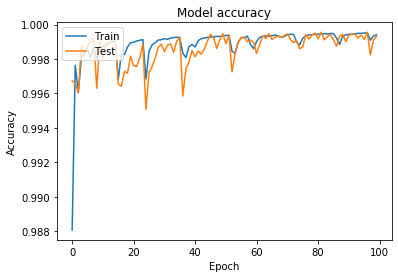

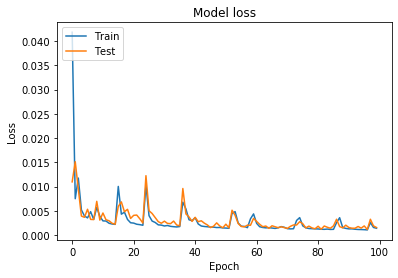

In [10]:
import matplotlib.pyplot as plt 

# Plot training & validation accuracy values
plt.plot(unettraining.history['accuracy'])
plt.plot(unettraining.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(unettraining.history['loss'])
plt.plot(unettraining.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
acc = open("acc.txt", "w+")
acc.write(str(unettraining.history['accuracy']))
acc.close()
val_acc = open("val_acc.txt", "w+")
val_acc.write(str(unettraining.history['val_accuracy']))
val_acc.close()
loss = open("loss.txt", "w+")
loss.write(str(unettraining.history['loss']))
loss.close()
val_loss =open("val_loss.txt", "w+")
val_loss.write(str(unettraining.history['val_loss']))
val_loss.close()

## Simpan Data Prediksi

In [ ]:
testGene = testGenerator('data/test')
results = cv2.normalize(src= model.predict_generator(testGene,238,verbose=1, callbacks = [model_checkpoint]), dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
saveResult('data/test', results)